                                            filename  n_stiches
0  SA_20220620-102621_8ka1kmwpywxv_incision_crop_...          2
1  SA_20220620-102621_8ka1kmwpywxv_incision_crop_...          1
2  SA_20220620-102621_8ka1kmwpywxv_incision_crop_...          2
3  SA_20220620-102621_8ka1kmwpywxv_incision_crop_...          0
4  SA_20220620-102621_8ka1kmwpywxv_incision_crop_...          4
Epoch 1, Train Accuracy: 0.99, Test Accuracy: 0.35294117647058826
Epoch 2, Train Accuracy: 0.99, Test Accuracy: 0.35294117647058826
Epoch 3, Train Accuracy: 0.99, Test Accuracy: 0.35294117647058826
Epoch 4, Train Accuracy: 0.99, Test Accuracy: 0.35294117647058826
Epoch 5, Train Accuracy: 0.99, Test Accuracy: 0.35294117647058826
Epoch 6, Train Accuracy: 0.99, Test Accuracy: 0.35294117647058826
Epoch 7, Train Accuracy: 0.99, Test Accuracy: 0.35294117647058826
Epoch 8, Train Accuracy: 0.99, Test Accuracy: 0.35294117647058826
Epoch 9, Train Accuracy: 0.99, Test Accuracy: 0.35294117647058826
Epoch 10, Train Accura

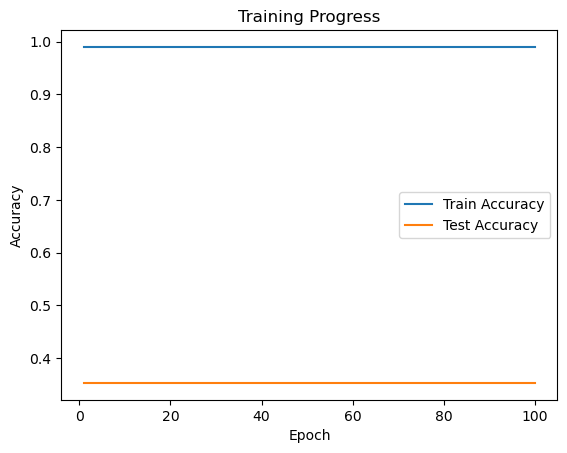

In [107]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import cv2
import os
from skimage.transform import resize
# Предположим, что у вас есть данные в формате X (признаки) и y (метки)
# X должен быть двумерным массивом, где каждая строка представляет изображение,
# а y - одномерным массивом, где каждый элемент является количеством швов на соответствующем изображении
df2 = pd.read_csv('output_segmentation.csv')
print(df2.head())
y=df2["n_stiches"]
X=[]
folder_path = "D:/ZDO/semestralni prace/images/incision_couples"
desired_width = 60
desired_height = 152

# Проход по всем файлам в папке
for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    if os.path.isfile(img_path):
        # Загрузка изображения с помощью scikit-image
        img = skimage.io.imread(img_path, as_gray=True)
        # Изменение размера изображения до желаемого размера
        edge_roberts = skimage.filters.roberts(img)

        nhanced_image = exposure.equalize_adapthist(edge_roberts, clip_limit=0.02)
        resized_img = resize(nhanced_image, (desired_width, desired_height), anti_aliasing=True)
        # Преобразование изображения в одномерный массив признаков и добавление в список X_train
        X.append(resized_img.flatten())
# Преобразование списка массивов признаков в массив numpy
X1 = np.array(X)


# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создание модели SVM
model = svm.SVC(kernel='linear')  # Линейное ядро

train_accuracies = []
test_accuracies = []
for epoch in range(1, 101):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print(f"Epoch {epoch}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

# Построение графика точности на обучающем и тестовом наборах данных
plt.plot(range(1, 101), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 101), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Progress')
plt.legend()
plt.show()

In [81]:
train_accuracy = model.score(X, y)
print(train_accuracy)

0.9626865671641791


In [97]:
prediction = model.predict(X_test)
print(prediction)

[1]


In [86]:
goal=[3,4,1,3,1,2,5]
score=0
for index in range(0, len(goal)):
    print(goal[0])
    if goal[index]==prediction[index]:
        score=score+1
normilized_score=score/len(goal)*100
print(normilized_score)

3
3
3
3
3
3
3
42.857142857142854


In [98]:
y_test


127    3
Name: n_stiches, dtype: int64